In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',80)
pd.set_option('display.max_rows',300)

# Data Understanding

In [3]:
#Reading the application dataset
loan = pd.read_csv(r"application_data.csv")
loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
loan.shape

(307511, 122)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
loan.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [7]:
loan.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

# Data Cleaning

In [8]:
#Summarising percentage of missing values in each column
round(100*(loan.isnull().sum()/len(loan.index)),2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [9]:
#Dropping columns with percentage of missing values > 50%
cols = loan.columns[round(100*(loan.isnull().sum()/len(loan.index)),2) >= 50.00]
loan.drop(cols,axis=1,inplace=True)
round(100*(loan.isnull().sum()/len(loan.index)),2).sort_values(ascending=False)

FLOORSMAX_AVG                   49.76
FLOORSMAX_MEDI                  49.76
FLOORSMAX_MODE                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
NAME_TYPE_SUITE                  0.42
DEF_60_CNT_SOCIAL_CIRCLE         0.33
OBS_30_CNT_SOCIAL_CIRCLE         0.33
DEF_30_CNT_SOCIAL_CIRCLE         0.33
OBS_60_CNT_SOCIAL_CIRCLE         0.33
EXT_SOURCE_2                     0.21
AMT_GOODS_PRICE                  0.09
FLAG_DOCUMENT_5                  0.00
NAME_FAMILY_STATUS               0.00
FLAG_EMAIL                       0.00
FLAG_PHONE  

In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [11]:
#Indentifying categorical variables
loan.nunique().sort_values()

FLAG_DOCUMENT_3                      2
FLAG_PHONE                           2
FLAG_DOCUMENT_4                      2
FLAG_DOCUMENT_2                      2
REG_REGION_NOT_LIVE_REGION           2
REG_REGION_NOT_WORK_REGION           2
LIVE_REGION_NOT_WORK_REGION          2
REG_CITY_NOT_LIVE_CITY               2
REG_CITY_NOT_WORK_CITY               2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_14                     2
FLAG_DOCUMENT_13                     2
FLAG_DOCUMENT_12                     2
FLAG_DOCUMENT_11                     2
FLAG_DOCUMENT_10                     2
FLAG_DOCUMENT_9                      2
FLAG_DOCUMENT_8                      2
FLAG_DOCUMENT_7                      2
EMERGENCYSTATE_MODE                  2
FLAG_DOCUMENT_6                      2
FLAG_CONT_MOBILE                     2
FLAG_WORK_PHONE                      2
FLAG_EMAIL                           2
FLAG_MOBIL                           2
TARGET                               2
NAME_CONTRACT_TYPE       

In [12]:
#Changing data type to 'object' for categorical variables
cols = loan.columns[loan.nunique() <= 58]
loan[cols] = loan[cols].astype(object)
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  object 
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  object 
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [13]:
#Changing data type of SK_ID_CURR to object since it is not a numerical field but rather an identity number of a client
loan['SK_ID_CURR'] = loan['SK_ID_CURR'].astype(object)

In [14]:
loan.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,157504.000000,159080.000000,307510.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.977752,0.102547,-962.858788
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.059897,0.107462,826.808487
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,3.924574e-01,0.370650,0.976700,0.166700,0.976700,0.976700,0.041200,-1570.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,5.659614e-01,0.535276,0.981600,0.166700,0.981600,0.981600,0.068800,-757.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,6.636171e-01,0.669057,0.986600,0.333300,0.986600,0.986600,0.127600,-274.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,8.549997e-01,0.896010,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [15]:
#Coverting negative days-fields to positive
loan[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = loan[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].apply(abs)
loan.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,157504.000000,159080.000000,307510.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.977752,0.102547,962.858788
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.059897,0.107462,826.808487
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,3.924574e-01,0.370650,0.976700,0.166700,0.976700,0.976700,0.041200,274.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,5.659614e-01,0.535276,0.981600,0.166700,0.981600,0.981600,0.068800,757.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,6.636171e-01,0.669057,0.986600,0.333300,0.986600,0.986600,0.127600,1570.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,8.549997e-01,0.896010,1.000000,1.000000,1.000000,1.000000,1.000000,4292.000000


In [16]:
#Creating CLIENT_AGE and EMPLOYED_YEARS fields
loan['CLIENT_AGE'] = loan['DAYS_BIRTH'].apply(lambda x: x//365)
loan['EMPLOYED_YEARS'] = loan['DAYS_EMPLOYED'].apply(lambda x: x//365)
loan.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,CLIENT_AGE,EMPLOYED_YEARS
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,157504.000000,159080.000000,307510.000000,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.977752,0.102547,962.858788,43.435968,185.021521
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.059897,0.107462,826.808487,11.954593,381.972190
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,3.924574e-01,0.370650,0.976700,0.166700,0.976700,0.976700,0.041200,274.000000,34.000000,2.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,5.659614e-01,0.535276,0.981600,0.166700,0.981600,0.981600,0.068800,757.000000,43.000000,6.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,6.636171e-01,0.669057,0.986600,0.333300,0.986600,0.986600,0.127600,1570.000000,53.000000,15.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,8.549997e-01,0.896010,1.000000,1.000000,1.000000,1.000000,1.000000,4292.000000,69.000000,1000.000000


In [17]:
#Correcting CODE_GENDER and EMPLOYED_YEARS fields
loan.loc[loan["CODE_GENDER"] == "XNA","CODE_GENDER"] = np.NaN
loan.loc[loan["EMPLOYED_YEARS"] < 0,"EMPLOYED_YEARS"] = np.NaN
loan.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,CLIENT_AGE,EMPLOYED_YEARS
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,157504.000000,159080.000000,307510.000000,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.977752,0.102547,962.858788,43.435968,185.021521
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.059897,0.107462,826.808487,11.954593,381.972190
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,3.924574e-01,0.370650,0.976700,0.166700,0.976700,0.976700,0.041200,274.000000,34.000000,2.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,5.659614e-01,0.535276,0.981600,0.166700,0.981600,0.981600,0.068800,757.000000,43.000000,6.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,6.636171e-01,0.669057,0.986600,0.333300,0.986600,0.986600,0.127600,1570.000000,53.000000,15.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,8.549997e-01,0.896010,1.000000,1.000000,1.000000,1.000000,1.000000,4292.000000,69.000000,1000.000000


In [18]:
#Dropping rows based on columns which have missing values less than 1000
loan = loan[loan['DAYS_LAST_PHONE_CHANGE'].notna()]
loan = loan[loan['CNT_FAM_MEMBERS'].notna()]
loan = loan[loan['CODE_GENDER'].notna()]
loan = loan[loan['AMT_ANNUITY'].notna()]
loan = loan[loan['AMT_GOODS_PRICE'].notna()]
loan = loan[loan['EXT_SOURCE_2'].notna()]
loan.shape

(306558, 83)

#### There was a loss of around 0.3% of the data which does not impact our analysis in any way

In [19]:
#Columns having percentage of missing values less than 13% and greater than 0%
cols = loan.columns[(100*(loan.isnull().sum()/len(loan.index)) <= 13) & (100*(loan.isnull().sum()/len(loan.index)) > 0)]
loan[cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306558 entries, 0 to 307510
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   NAME_TYPE_SUITE           305544 non-null  object
 1   OBS_30_CNT_SOCIAL_CIRCLE  305541 non-null  object
 2   DEF_30_CNT_SOCIAL_CIRCLE  305541 non-null  object
 3   OBS_60_CNT_SOCIAL_CIRCLE  305541 non-null  object
 4   DEF_60_CNT_SOCIAL_CIRCLE  305541 non-null  object
dtypes: object(5)
memory usage: 14.0+ MB


In [20]:
#Frequency of categories of NAME_TYPE_SUITE
100*(loan['NAME_TYPE_SUITE'].value_counts()/len(loan.NAME_TYPE_SUITE))

Unaccompanied      80.896274
Family             13.067348
Spouse, partner     3.699137
Children            1.061789
Other_B             0.574769
Other_A             0.282165
Group of people     0.087748
Name: NAME_TYPE_SUITE, dtype: float64

#### For NAME_TYPE_SUITE, about 81% of the values lie within the category of 'Unaccompanied' so we can impute the missing values using 'Unaccompanied'

In [21]:
#Frequency of categories of OBS_30_CNT_SOCIAL_CIRCLE
100*(loan['OBS_30_CNT_SOCIAL_CIRCLE'].value_counts()/len(loan.OBS_30_CNT_SOCIAL_CIRCLE))

0.0      53.286164
1.0      15.865839
2.0       9.698328
3.0       6.610821
4.0       4.600435
5.0       3.110015
6.0       2.099766
7.0       1.427789
8.0       0.965560
9.0       0.651100
10.0      0.447876
11.0      0.276946
12.0      0.211705
13.0      0.133417
14.0      0.084160
15.0      0.053823
16.0      0.043385
17.0      0.028706
18.0      0.015005
19.0      0.014353
20.0      0.009786
21.0      0.009460
22.0      0.007176
23.0      0.004893
24.0      0.003588
25.0      0.003588
27.0      0.001631
26.0      0.000979
30.0      0.000652
47.0      0.000326
28.0      0.000326
29.0      0.000326
348.0     0.000326
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

#### For OBS_30_CNT_SOCIAL_CIRCLE, about 53% of the values lie within category of '0' so we can impute the missing values using '0.0'

In [22]:
#Frequency of categories of OBS_60_CNT_SOCIAL_CIRCLE
100*(loan['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts()/len(loan.OBS_60_CNT_SOCIAL_CIRCLE))

0.0      53.531795
1.0      15.894545
2.0       9.684301
3.0       6.575591
4.0       4.536499
5.0       3.080657
6.0       2.066819
7.0       1.412783
8.0       0.939137
9.0       0.636747
10.0      0.434176
11.0      0.272053
12.0      0.201593
13.0      0.130155
14.0      0.077636
15.0      0.053823
16.0      0.044690
17.0      0.023813
18.0      0.015984
19.0      0.014353
20.0      0.009786
21.0      0.009134
22.0      0.006524
23.0      0.004241
24.0      0.003914
25.0      0.003588
27.0      0.001631
29.0      0.000652
47.0      0.000326
26.0      0.000326
28.0      0.000326
30.0      0.000326
344.0     0.000326
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

#### For OBS_60_CNT_SOCIAL_CIRCLE, about 54% of the values lie within category of '0' so we can impute the missing values using '0.0'

In [23]:
#Frequency of categories of DEF_30_CNT_SOCIAL_CIRCLE
100*(loan['DEF_30_CNT_SOCIAL_CIRCLE'].value_counts()/len(loan.DEF_30_CNT_SOCIAL_CIRCLE))

0.0     88.229634
1.0      9.214896
2.0      1.731483
3.0      0.387529
4.0      0.081877
5.0      0.018267
6.0      0.003588
34.0     0.000326
8.0      0.000326
7.0      0.000326
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

#### For DEF_30_CNT_SOCIAL_CIRCLE, about 88% of the values lie within category of '0' so we can impute the missing values using '0.0'

In [24]:
#Frequency of categories of DEF_60_CNT_SOCIAL_CIRCLE
100*(loan['DEF_60_CNT_SOCIAL_CIRCLE'].value_counts()/len(loan.DEF_60_CNT_SOCIAL_CIRCLE))

0.0     91.285173
1.0      7.105670
2.0      1.031126
3.0      0.194417
4.0      0.043711
5.0      0.006524
6.0      0.000979
24.0     0.000326
7.0      0.000326
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

#### For DEF_60_CNT_SOCIAL_CIRCLE, about 91% of the values lie within category of '0' so we can impute the missing values using '0.0'

In [25]:
#Coverting unit of fields to thousands
loan[['AMT_INCOME_TOTAL_IN_1000','AMT_CREDIT_IN_1000','AMT_ANNUITY_IN_1000','AMT_GOODS_PRICE_IN_1000']] = loan[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].apply(lambda x: x/1000)

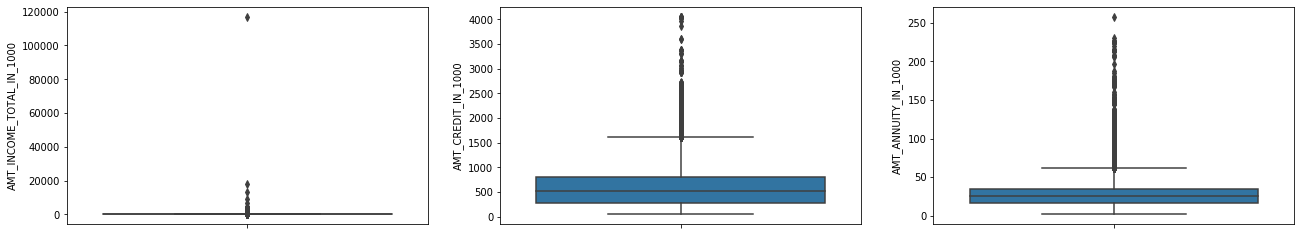

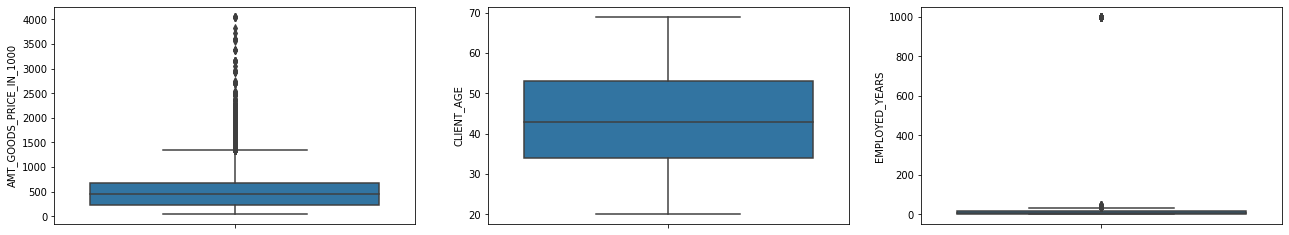

In [26]:
#Checking for Outliers
figa, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(22, 4))
sns.boxplot(y='AMT_INCOME_TOTAL_IN_1000',data=loan,ax=ax1)
sns.boxplot(y='AMT_CREDIT_IN_1000',data=loan,ax=ax2)
sns.boxplot(y='AMT_ANNUITY_IN_1000',data=loan,ax=ax3)

figb, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(22, 4))
sns.boxplot(y='AMT_GOODS_PRICE_IN_1000',data=loan,ax=ax1)
sns.boxplot(y='CLIENT_AGE',data=loan,ax=ax2)
sns.boxplot(y='EMPLOYED_YEARS',data=loan,ax=ax3)

plt.show()

In [27]:
loan[['AMT_INCOME_TOTAL_IN_1000','AMT_CREDIT_IN_1000','AMT_ANNUITY_IN_1000','AMT_GOODS_PRICE_IN_1000','EMPLOYED_YEARS']].describe()

,AMT_INCOME_TOTAL_IN_1000,AMT_CREDIT_IN_1000,AMT_ANNUITY_IN_1000,AMT_GOODS_PRICE_IN_1000,EMPLOYED_YEARS
count,306558.000000,306558.000000,306558.000000,306558.000000,306558.000000
mean,168.882333,599.600883,27.130276,538.670474,185.005258
std,237.447060,402.650182,14.496212,369.573745,381.957080
min,25.650000,45.000000,1.615500,40.500000,0.000000
25%,112.500000,270.000000,16.561125,238.500000,2.000000
50%,148.500000,514.777500,24.930000,450.000000,6.000000
75%,202.500000,808.650000,34.609500,679.500000,15.000000
max,117000.000000,4050.000000,258.025500,4050.000000,1000.000000


In [28]:
loan[['AMT_INCOME_TOTAL_IN_1000','AMT_CREDIT_IN_1000','AMT_ANNUITY_IN_1000','AMT_GOODS_PRICE_IN_1000','EMPLOYED_YEARS']].quantile([0.75,0.9,0.95,0.975,0.99,0.999,1])

,AMT_INCOME_TOTAL_IN_1000,AMT_CREDIT_IN_1000,AMT_ANNUITY_IN_1000,AMT_GOODS_PRICE_IN_1000,EMPLOYED_YEARS
0.750,202.5,808.650000,34.60950,679.5,15.0
0.900,270.0,1133.748000,45.95400,1098.0,1000.0
0.950,337.5,1350.000000,53.32500,1305.0,1000.0
0.975,405.0,1574.804363,61.15050,1395.0,1000.0
0.990,472.5,1862.802000,70.01037,1800.0,1000.0
0.999,900.0,2517.300000,110.04750,2250.0,1000.0
1.000,117000.0,4050.000000,258.02550,4050.0,1000.0


#### Outliers lie in the following fields:
#### 1. AMT_INCOME_TOTAL above 2 lacs
#### 2. AMT_CREDIT above 15 lacs
#### 3. AMT_ANNUITY above 60,000
#### 4. AMT_GOODS_PRICE above 13 lacs
#### 5. EMPLOYED_YEARS above 19 years

In [29]:
#Binning continuous numerical variables
loan['CLIENT_AGE_BAND'] = pd.cut(loan['CLIENT_AGE'],[0,17,25,35,45,55,np.inf])
loan['EMPLOYED_YEARS_BANDED'] = pd.cut(loan['EMPLOYED_YEARS'],[-np.inf,2,4,6,10,14,np.inf])
loan['TOTAL_INCOME_BANDED_IN_1000'] = pd.cut(loan['AMT_INCOME_TOTAL_IN_1000'],[-np.inf,100,200,300,400,500,np.inf])
loan['CREDIT_BANDED_IN_1000'] = pd.cut(loan['AMT_CREDIT_IN_1000'],[-np.inf,200,400,600,800,1000,np.inf])
loan['ANNUITY_BANDED_IN_1000'] = pd.cut(loan['AMT_ANNUITY_IN_1000'],[-np.inf,10,20,30,40,np.inf])
loan['GOODS_PRICE_BANDED_IN_1000'] = pd.cut(loan['AMT_GOODS_PRICE_IN_1000'],[-np.inf,200,400,600,800,1000,np.inf])
loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_AGE,EMPLOYED_YEARS,AMT_INCOME_TOTAL_IN_1000,AMT_CREDIT_IN_1000,AMT_ANNUITY_IN_1000,AMT_GOODS_PRICE_IN_1000,CLIENT_AGE_BAND,EMPLOYED_YEARS_BANDED,TOTAL_INCOME_BANDED_IN_1000,CREDIT_BANDED_IN_1000,ANNUITY_BANDED_IN_1000,GOODS_PRICE_BANDED_IN_1000
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,...,2,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,1.0,202.5,406.5975,24.7005,351.0,"(17.0, 25.0]","(-inf, 2.0]","(200.0, 300.0]","(400.0, 600.0]","(20.0, 30.0]","(200.0, 400.0]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,...,0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,45,3.0,270.0,1293.5025,35.6985,1129.5,"(35.0, 45.0]","(2.0, 4.0]","(200.0, 300.0]","(1000.0, inf]","(30.0, 40.0]","(1000.0, inf]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1,2,2,MONDAY,9,0,0,0,0,0,0,Government,...,0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,0.0,67.5,135.0000,6.7500,135.0,"(45.0, 55.0]","(-inf, 2.0]","(-inf, 100.0]","(-inf, 200.0]","(-inf, 10.0]","(-inf, 200.0]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,...,0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,8.0,135.0,312.6825,29.6865,297.0,"(45.0, 55.0]","(6.0, 10.0]","(100.0, 200.0]","(200.0, 400.0]","(20.0, 30.0]","(200.0, 400.0]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,...,0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,8.0,121.5,513.0000,21.8655,513.0,"(45.0, 55.0]","(6.0, 10.0]","(100.0, 200.0]","(400.0, 600.0]","(20.0, 30.0]","(400.0, 600.0]"


# Analysis

### Analysis on Base Dataset

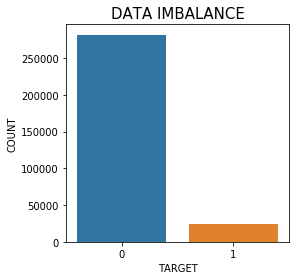


0    281806
1     24752
Name: TARGET, dtype: int64


In [30]:
#Checking the data imbalance by assessing the count of rows with TARGET=1 and 0
tgts=loan.groupby('TARGET').count()['SK_ID_CURR']
fig1,ax=plt.subplots(figsize=(4,4))

ax=sns.barplot(x=tgts.index,y=tgts.values,label='TARGET')
ax.set_xlabel('TARGET')
ax.set_ylabel('COUNT')
ax.set_title('DATA IMBALANCE',fontsize=15)
plt.show()
print()
print(loan.TARGET.value_counts())

In [31]:
#Imbalance Percentage
round((loan.TARGET.value_counts()/len(loan.index))*100)

0    92.0
1     8.0
Name: TARGET, dtype: float64

#### Out of the 306558 rows, 281806 rows are 0 and only 24752 rows are 1. That means 8% of the people had payment difficulties and hence delayed payments while 92% pertain to all other cases.

In [32]:
#Dividing dataframe into two with respect to TARGET
loan_0 = loan[loan['TARGET'] == 0]
loan_1 = loan[loan['TARGET'] == 1]

In [33]:
print(loan_0.shape)
print(loan_1.shape)

(281806, 93)
(24752, 93)


In [34]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306558 entries, 0 to 307510
Data columns (total 93 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   SK_ID_CURR                    306558 non-null  object  
 1   TARGET                        306558 non-null  object  
 2   NAME_CONTRACT_TYPE            306558 non-null  object  
 3   CODE_GENDER                   306558 non-null  object  
 4   FLAG_OWN_CAR                  306558 non-null  object  
 5   FLAG_OWN_REALTY               306558 non-null  object  
 6   CNT_CHILDREN                  306558 non-null  object  
 7   AMT_INCOME_TOTAL              306558 non-null  float64 
 8   AMT_CREDIT                    306558 non-null  float64 
 9   AMT_ANNUITY                   306558 non-null  float64 
 10  AMT_GOODS_PRICE               306558 non-null  float64 
 11  NAME_TYPE_SUITE               305544 non-null  object  
 12  NAME_INCOME_TYPE              

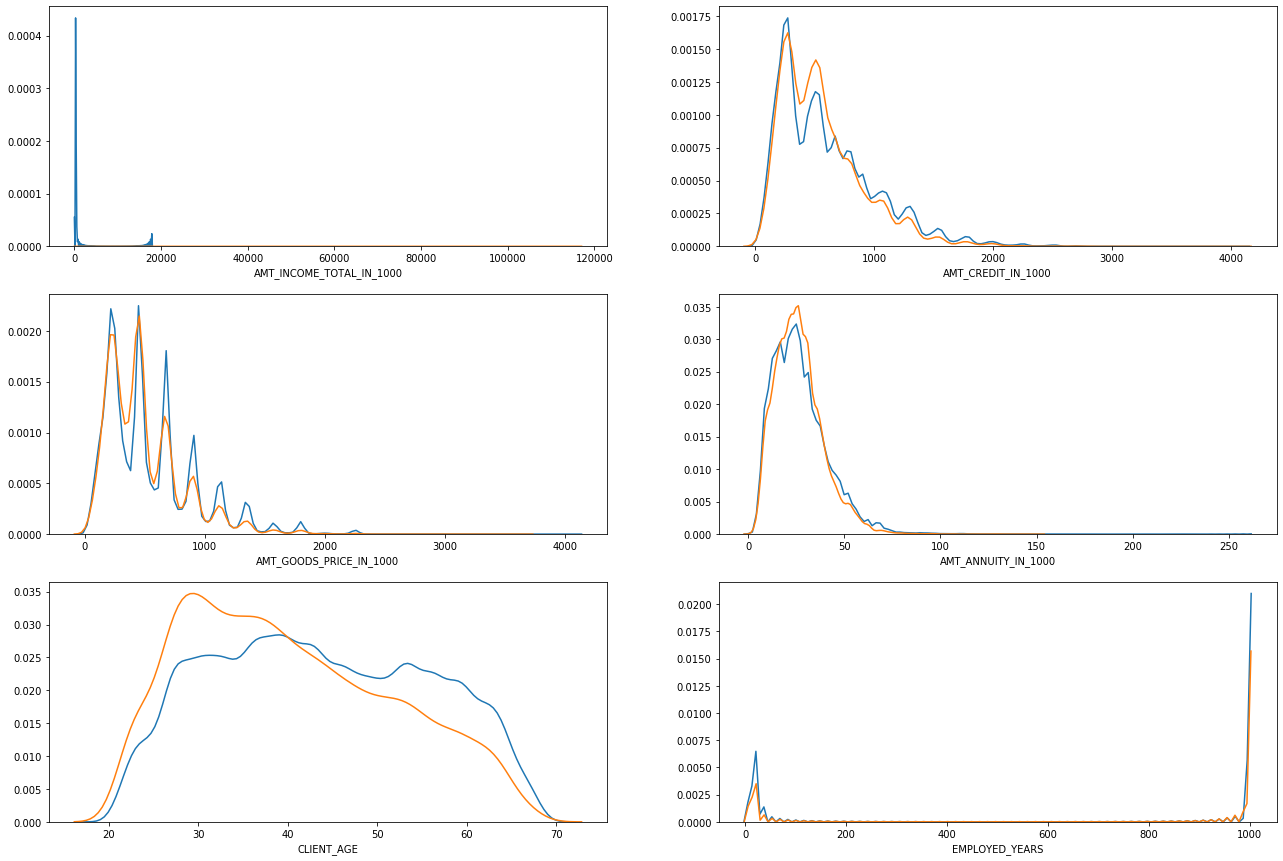

In [35]:
#Univariate analysis on contiuous variables
#Orange: Target = 1 & Blue: Target = 0
plt.figure(1,figsize=(22,15))

plt.subplot(3,2,1)
sns.distplot(loan_0['AMT_INCOME_TOTAL_IN_1000'],hist=False)
sns.distplot(loan_1['AMT_INCOME_TOTAL_IN_1000'],hist=False)

plt.subplot(3,2,2)
sns.distplot(loan_0['AMT_CREDIT_IN_1000'],hist=False)
sns.distplot(loan_1['AMT_CREDIT_IN_1000'],hist=False)

plt.subplot(3,2,3)
sns.distplot(loan_0['AMT_GOODS_PRICE_IN_1000'],hist=False)
sns.distplot(loan_1['AMT_GOODS_PRICE_IN_1000'],hist=False)

plt.subplot(3,2,4)
sns.distplot(loan_0['AMT_ANNUITY_IN_1000'],hist=False)
sns.distplot(loan_1['AMT_ANNUITY_IN_1000'],hist=False)

plt.subplot(3,2,5)
sns.distplot(loan_0['CLIENT_AGE'],hist=False)
sns.distplot(loan_1['CLIENT_AGE'],hist=False)

plt.subplot(3,2,6)
sns.distplot(loan_0['EMPLOYED_YEARS'],hist=False)
sns.distplot(loan_1['EMPLOYED_YEARS'],hist=False)

plt.show()

#### There is no significant difference in trends for both cases for any of the variables, except for CLIENT_AGE where it is more densely populated in the range 20 to 40 years after which there is a downward trend when TARGET = 1, that is the client is having difficulty to make payments while it is more or less uniformly distributed between ages 20 and 70 when TARGET = 0.

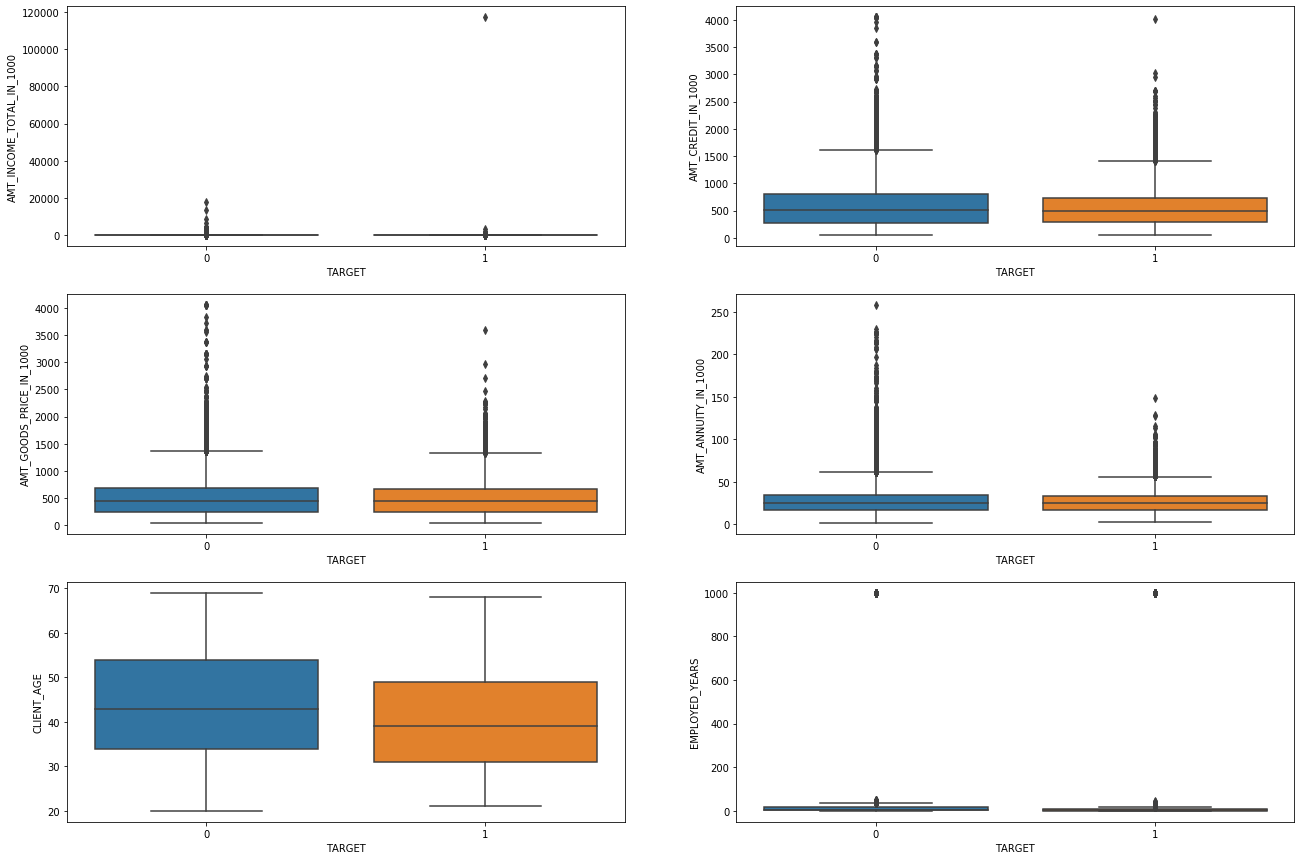

In [36]:
plt.figure(1,figsize=(22,15))

plt.subplot(3,2,1)
sns.boxplot(data=loan,x="TARGET",y="AMT_INCOME_TOTAL_IN_1000")

plt.subplot(3,2,2)
sns.boxplot(data=loan,x="TARGET",y="AMT_CREDIT_IN_1000")

plt.subplot(3,2,3)
sns.boxplot(data=loan,x="TARGET",y="AMT_GOODS_PRICE_IN_1000")

plt.subplot(3,2,4)
sns.boxplot(data=loan,x="TARGET",y="AMT_ANNUITY_IN_1000")

plt.subplot(3,2,5)
sns.boxplot(data=loan,x="TARGET",y="CLIENT_AGE")

plt.subplot(3,2,6)
sns.boxplot(data=loan,x="TARGET",y="EMPLOYED_YEARS")

plt.show()

#### All except client's age seems to be distributed differently for the two cases, that is when TARGET = 0 and TARGET = 1

In [37]:
#Confirming the difference in distributions for CLIENT_AGE
loan.groupby('TARGET')['CLIENT_AGE'].quantile([0.25,0.5,0.75,0.9,0.95,0.99,1])

TARGET      
0       0.25    34.0
        0.50    43.0
        0.75    54.0
        0.90    60.0
        0.95    63.0
        0.99    66.0
        1.00    69.0
1       0.25    31.0
        0.50    39.0
        0.75    49.0
        0.90    57.0
        0.95    61.0
        0.99    65.0
        1.00    68.0
Name: CLIENT_AGE, dtype: float64

#### This shows that people of lower ages were actually the ones having payment difficulties, that is, they lie in the dataset where TARGET = 1.
#### 75th percentile is 54 when TARGET = 0 while 49 when TARGET = 1.

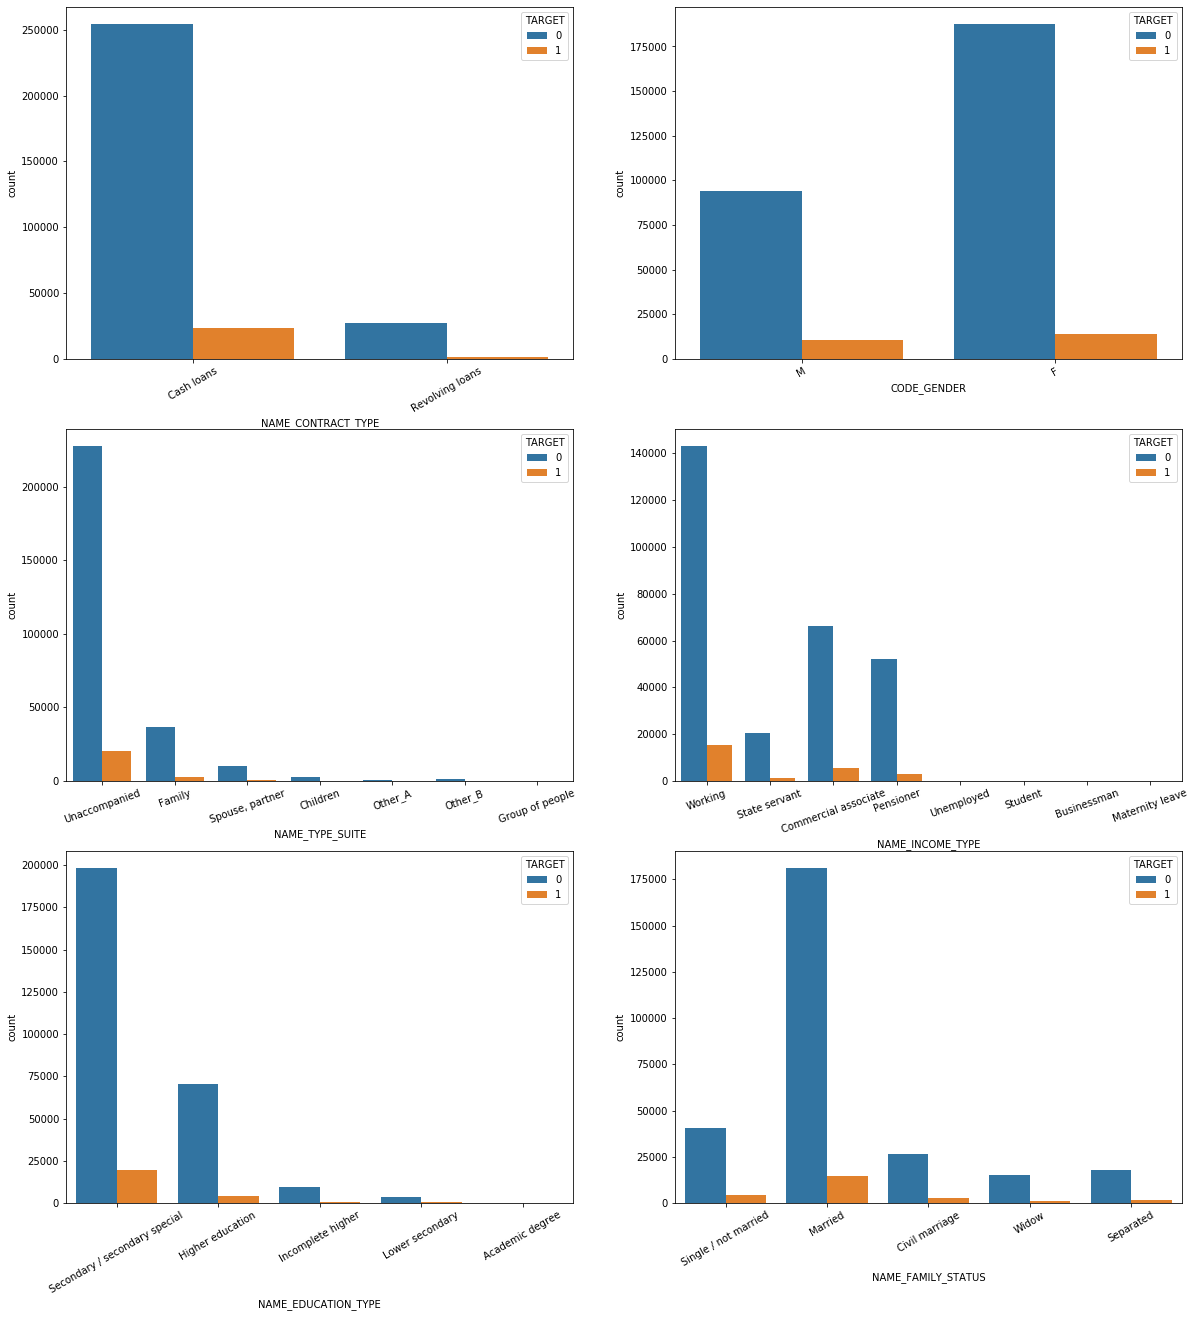

In [38]:
#Univariate analysis on categorical variables
plt.figure(figsize = (20,22))

plt.subplot(3,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'TARGET', data = loan)
plt.xticks(rotation = 30)

plt.subplot(3,2,2)
sns.countplot(x = 'CODE_GENDER', hue = 'TARGET', data = loan)
plt.xticks(rotation = 30)

plt.subplot(3,2,3)
sns.countplot(x = 'NAME_TYPE_SUITE', hue = 'TARGET', data = loan)
plt.xticks(rotation = 20)

plt.subplot(3,2,4)
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'TARGET', data = loan)
plt.xticks(rotation = 20)

plt.subplot(3,2,5)
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'TARGET', data = loan)
plt.xticks(rotation = 30)

plt.subplot(3,2,6)
sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'TARGET', data = loan)
plt.xticks(rotation = 30)

plt.show()

#### The distribution is very similar for all 6 variables for both possible values of TARGET. The ditribution is as follows:
#### 1. There is a significantly higher proportion of clients who have opted for Cash Loans as compared to Revolving Loans
#### 2. Higher proportions of females have taken a loan as compared to males
#### 3. Majority of clients have an unaccompanied type of suite
#### 4. Working clients are of a significantly higher proportion followed by Commercial Associate, Pensioner and State Servant
#### 5. Most clients have obtained secondary education
#### 6. Majority of clients are married followed by single, civil maried, separated and widow

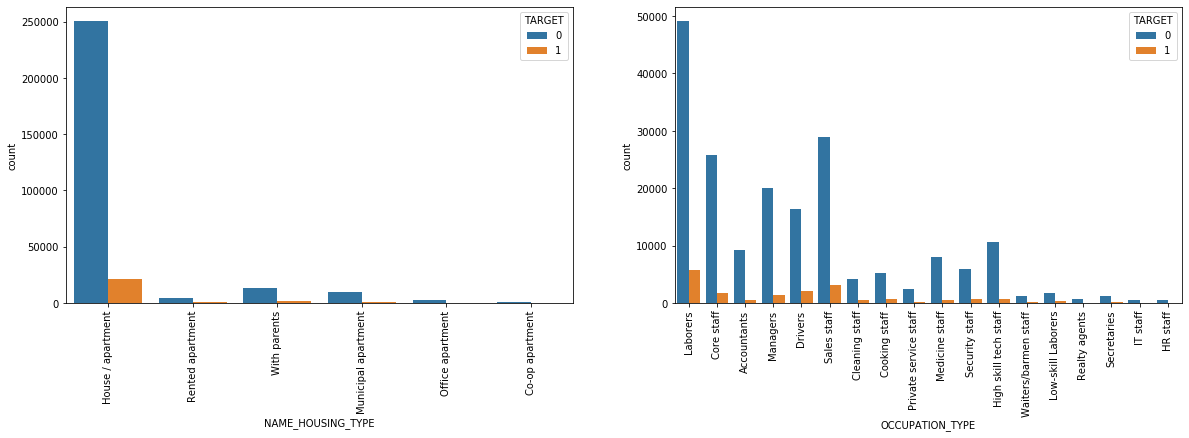

In [39]:
plt.figure(figsize = (20,12))

plt.subplot(2,2,1)
sns.countplot(x = 'NAME_HOUSING_TYPE', hue = 'TARGET', data = loan)
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x = 'OCCUPATION_TYPE', hue = 'TARGET', data = loan)
plt.xticks(rotation = 90)

plt.show()

#### Observations from above:
#### 1. Significant proportion of clients own a house/apartment in both cases but proportion being larger when TARGET = 0
#### 2. Largest proportion of clients are Labourers in both cases. Drivers are of higher proportion as compared to managers when TARGET = 1 unlike when TARGET = 0. Also cooking staff, security staff and high skill tech staff have almost equal proportion when TARGET = 1, so also could be put in one common bucket.

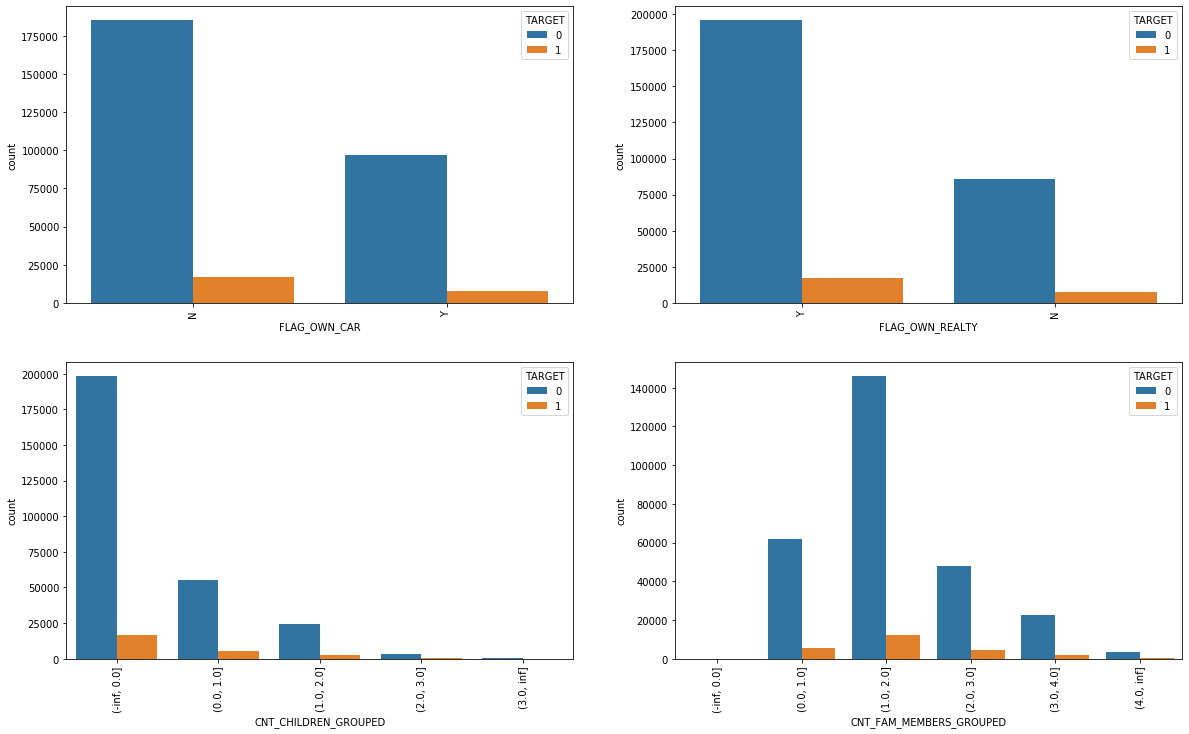

In [40]:
plt.figure(figsize = (20,12))

plt.subplot(2,2,1)
sns.countplot(x = 'FLAG_OWN_CAR', hue = 'TARGET', data = loan)
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.countplot(x = 'FLAG_OWN_REALTY', hue = 'TARGET', data = loan)
plt.xticks(rotation = 90)

loan['CNT_CHILDREN_GROUPED'] = pd.cut(loan['CNT_CHILDREN'],[-np.inf,0,1,2,3,np.inf])
plt.subplot(2,2,3)
sns.countplot(x = 'CNT_CHILDREN_GROUPED', hue = 'TARGET', data = loan)
plt.xticks(rotation = 90)

loan['CNT_FAM_MEMBERS_GROUPED'] = pd.cut(loan['CNT_FAM_MEMBERS'],[-np.inf,0,1,2,3,4,np.inf])
plt.subplot(2,2,4)
sns.countplot(x = 'CNT_FAM_MEMBERS_GROUPED', hue = 'TARGET', data = loan)
plt.xticks(rotation = 90)

plt.show()

#### A very similar trend is followed by both cases for all 4 variables. These tends are as follows:
#### 1. Majority do not own a car
#### 2. Majority own realty
#### 3. Proportion decreases with the increase in the number of children
#### 4. CNT_FAM_MEMBERS is positively skewed with its peak lying on 2 members

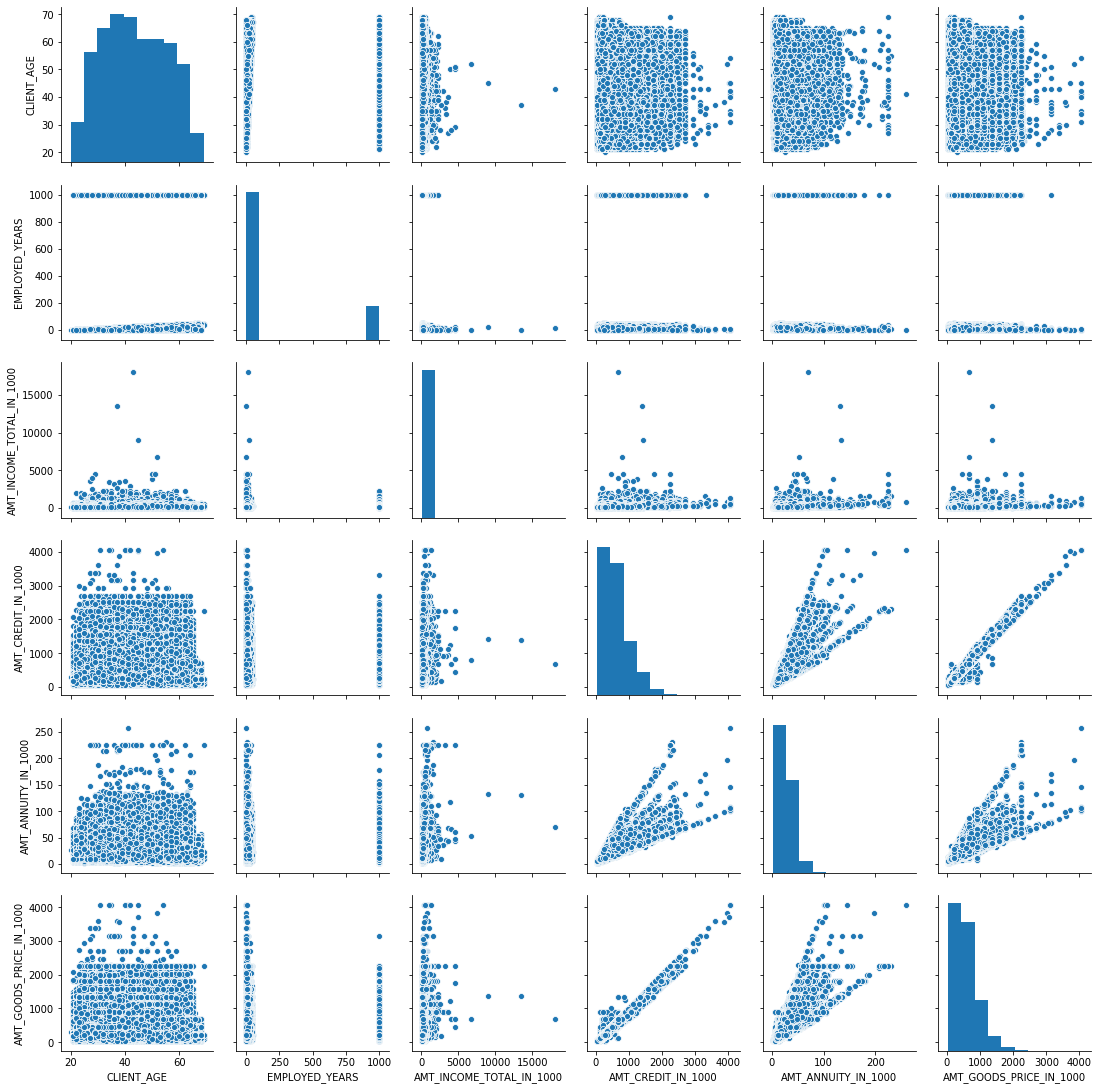

In [41]:
#Bivariate analysis when TARGET = 0
sns.pairplot(data=loan_0,vars=['CLIENT_AGE','EMPLOYED_YEARS','AMT_INCOME_TOTAL_IN_1000','AMT_CREDIT_IN_1000','AMT_ANNUITY_IN_1000','AMT_GOODS_PRICE_IN_1000'])
plt.show()

#### Here we can see a few outliers when total income is more than 90 lacs

In [42]:
#Correlations between numeric variables where TARGET = 0
corr_0 = loan_0.corr()
corr_0 = corr_0.where(np.triu(np.ones(corr_0.shape),k=1).astype(np.bool))
corr_df0 = corr_0.unstack().reset_index()
corr_df0.columns = ['VAR1','VAR2','Correlation']
corr_df0.dropna(subset = ['Correlation'],inplace=True)
corr_df0['Correlation'] = round(corr_df0['Correlation'],2)
corr_df0['Correlation_abs'] = corr_df0['Correlation'].abs()
corr_df0 = corr_df0[corr_df0['Correlation_abs'] != 1]
corr_df0 = corr_df0[~corr_df0.VAR1.str.contains('1000')]
corr_df0 = corr_df0[~corr_df0.VAR2.str.contains('1000')]
corr_df0.sort_values(by = 'Correlation_abs', ascending = False).head(15)

,VAR1,VAR2,Correlation,Correlation_abs
70,AMT_GOODS_PRICE,AMT_CREDIT,0.99,0.99
333,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_AVG,0.99,0.99
310,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.97,0.97
335,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.96,0.96
71,AMT_GOODS_PRICE,AMT_ANNUITY,0.78,0.78
47,AMT_ANNUITY,AMT_CREDIT,0.77,0.77
431,EMPLOYED_YEARS,CLIENT_AGE,0.63,0.63
143,DAYS_EMPLOYED,DAYS_BIRTH,0.63,0.63
419,EMPLOYED_YEARS,DAYS_BIRTH,0.63,0.63
397,CLIENT_AGE,DAYS_EMPLOYED,0.63,0.63


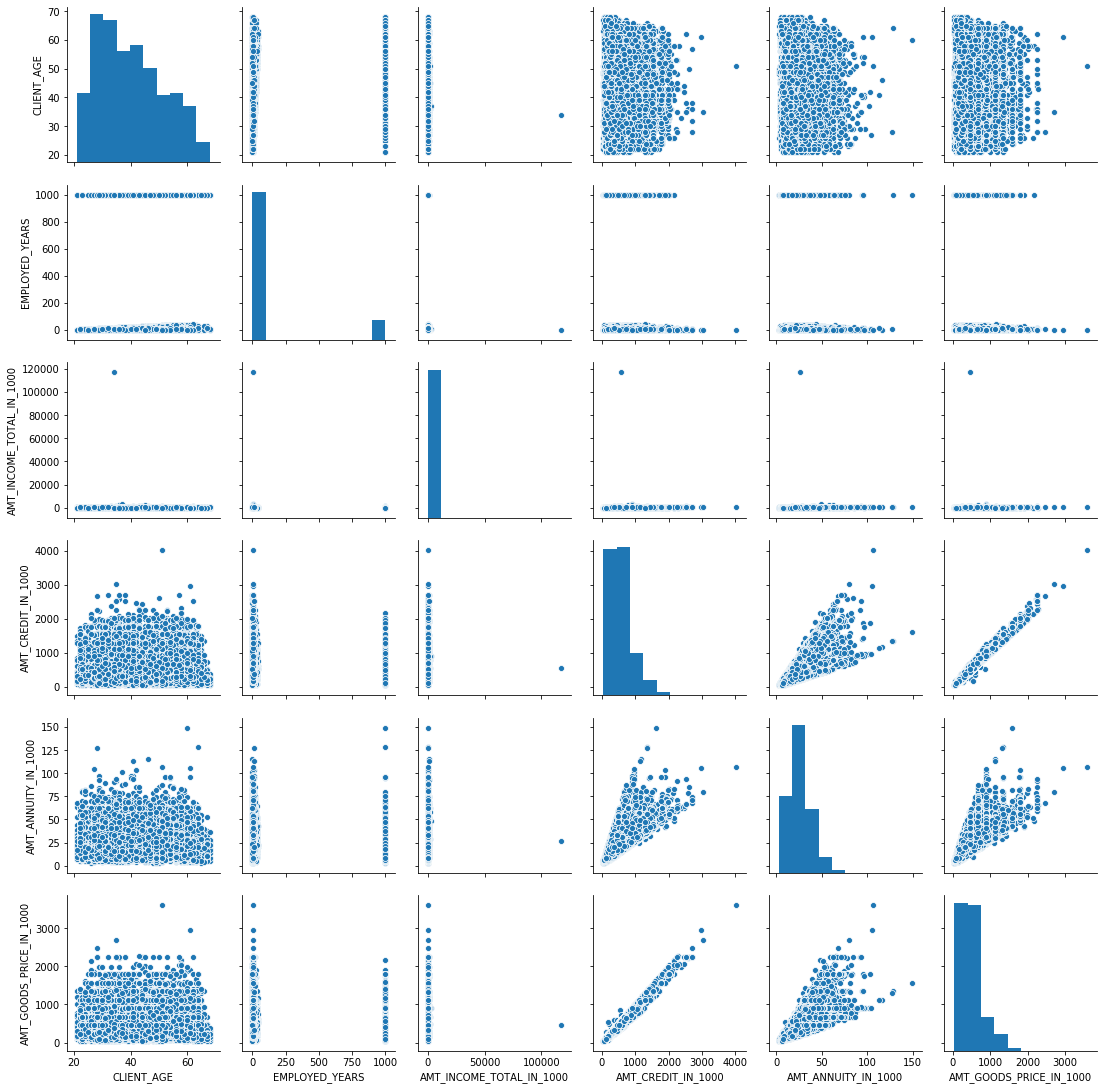

In [43]:
#Bivariate analysis when TARGET = 1
sns.pairplot(data=loan_1,vars=['CLIENT_AGE','EMPLOYED_YEARS','AMT_INCOME_TOTAL_IN_1000','AMT_CREDIT_IN_1000','AMT_ANNUITY_IN_1000','AMT_GOODS_PRICE_IN_1000'])
plt.show()

#### There is one clear outlier when total income is greater than 10 Cr. which could affect our analysis. So we should analyse the portfolio without that client and should instead look into that client's loan separately

In [44]:
#Correlations between numeric variables where TARGET = 1
corr_1 = loan_1.corr()
corr_1 = corr_1.where(np.triu(np.ones(corr_1.shape),k=1).astype(np.bool))
corr_df1 = corr_1.unstack().reset_index()
corr_df1.columns = ['VAR1','VAR2','Correlation']
corr_df1.dropna(subset = ['Correlation'],inplace=True)
corr_df1['Correlation'] = round(corr_df1['Correlation'],2)
corr_df1['Correlation_abs'] = corr_df1['Correlation'].abs()
corr_df1 = corr_df1[corr_df1['Correlation_abs'] != 1]
corr_df1 = corr_df1[~corr_df1.VAR1.str.contains('1000')]
corr_df1 = corr_df1[~corr_df1.VAR2.str.contains('1000')]
corr_df1.sort_values(by = 'Correlation_abs', ascending = False).head(10)

,VAR1,VAR2,Correlation,Correlation_abs
310,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,0.98,0.98
70,AMT_GOODS_PRICE,AMT_CREDIT,0.98,0.98
335,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,0.98,0.98
47,AMT_ANNUITY,AMT_CREDIT,0.75,0.75
71,AMT_GOODS_PRICE,AMT_ANNUITY,0.75,0.75
357,TOTALAREA_MODE,FLOORSMAX_AVG,0.64,0.64
431,EMPLOYED_YEARS,CLIENT_AGE,0.58,0.58
143,DAYS_EMPLOYED,DAYS_BIRTH,0.58,0.58
397,CLIENT_AGE,DAYS_EMPLOYED,0.58,0.58
419,EMPLOYED_YEARS,DAYS_BIRTH,0.58,0.58


#### Variables with highest correlations are the same in both cases, when TARGET = 0 being slightly higher than when TARGET = 1 :
#### 1. AMT_GODS_PRICE and AMT_CREDIT are the strongest positively correlated variables with coeeficient of 0.98 when TARGET = 1 and 0.99 when TARGET = 0. This is expected since people get loans of an amount equivalent to what they are going to use it for.
#### 2. AMT_ANNUITY and AMT_CREDIT have a high correlation too since the annuity amount will be proportional to the loan amount 
#### 3. Due to this, indirectly AMT_GOODS_PRICE and AMT_ANNUITY are also highly correlated

### Analysis on Merged Dataset

In [45]:
#Reading the previous applications dataset
previous = pd.read_csv(r"previous_application.csv")
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
#Merging the two datasets
merged_df = pd.merge(loan, previous, how='left', on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,ANNUITY_BANDED_IN_1000,GOODS_PRICE_BANDED_IN_1000,CNT_CHILDREN_GROUPED,CNT_FAM_MEMBERS_GROUPED,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,...,"(20.0, 30.0]","(200.0, 400.0]","(-inf, 0.0]","(0.0, 1.0]",1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,...,"(30.0, 40.0]","(1000.0, inf]","(-inf, 0.0]","(1.0, 2.0]",1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,...,"(30.0, 40.0]","(1000.0, inf]","(-inf, 0.0]","(1.0, 2.0]",2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2,1,1,MONDAY,11,0,0,0,0,0,0,School,...,"(30.0, 40.0]","(1000.0, inf]","(-inf, 0.0]","(1.0, 2.0]",2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,

In [47]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426891 entries, 0 to 1426890
Columns: 131 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(8), float64(39), int64(4), object(80)
memory usage: 1.3+ GB


In [48]:
merged_df.dtypes

SK_ID_CURR                        object
TARGET                            object
NAME_CONTRACT_TYPE_x              object
CODE_GENDER                       object
FLAG_OWN_CAR                      object
FLAG_OWN_REALTY                   object
CNT_CHILDREN                      object
AMT_INCOME_TOTAL                 float64
AMT_CREDIT_x                     float64
AMT_ANNUITY_x                    float64
AMT_GOODS_PRICE_x                float64
NAME_TYPE_SUITE_x                 object
NAME_INCOME_TYPE                  object
NAME_EDUCATION_TYPE               object
NAME_FAMILY_STATUS                object
NAME_HOUSING_TYPE                 object
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                    int64
FLAG_MOBIL                        object
FLAG_EMP_PHONE                    object
FLAG_WORK_PHONE                   object
FLAG_CONT_MOBILE

In [49]:
100*(merged_df.isnull().sum()/len(merged_df.index)).sort_values(ascending=False)

RATE_INTEREST_PRIMARY           99.664866
RATE_INTEREST_PRIVILEGED        99.664866
AMT_DOWN_PAYMENT                53.585172
RATE_DOWN_PAYMENT               53.585172
NAME_TYPE_SUITE_y               49.722509
FLOORSMAX_AVG                   49.287086
FLOORSMAX_MODE                  49.287086
FLOORSMAX_MEDI                  49.287086
YEARS_BEGINEXPLUATATION_AVG     48.309927
YEARS_BEGINEXPLUATATION_MODE    48.309927
YEARS_BEGINEXPLUATATION_MEDI    48.309927
TOTALAREA_MODE                  47.802460
EMERGENCYSTATE_MODE             46.938414
NFLAG_INSURED_ON_APPROVAL       40.393275
DAYS_FIRST_DRAWING              40.393275
DAYS_FIRST_DUE                  40.393275
DAYS_LAST_DUE_1ST_VERSION       40.393275
DAYS_LAST_DUE                   40.393275
DAYS_TERMINATION                40.393275
OCCUPATION_TYPE                 32.356992
AMT_GOODS_PRICE_y               23.505089
AMT_ANNUITY_y                   22.644827
CNT_PAYMENT                     22.644477
EXT_SOURCE_3                    17

In [50]:
#Dropping columns with more than 50% missing values
cols = merged_df.columns[round(100*(merged_df.isnull().sum()/len(merged_df.index)),2) >= 50.00]
merged_df.drop(cols,axis=1,inplace=True)
round(100*(merged_df.isnull().sum()/len(merged_df.index)),2).sort_values(ascending=False)

NAME_TYPE_SUITE_y               49.72
FLOORSMAX_MODE                  49.29
FLOORSMAX_MEDI                  49.29
FLOORSMAX_AVG                   49.29
YEARS_BEGINEXPLUATATION_MEDI    48.31
YEARS_BEGINEXPLUATATION_MODE    48.31
YEARS_BEGINEXPLUATATION_AVG     48.31
TOTALAREA_MODE                  47.80
EMERGENCYSTATE_MODE             46.94
NFLAG_INSURED_ON_APPROVAL       40.39
DAYS_TERMINATION                40.39
DAYS_FIRST_DRAWING              40.39
DAYS_FIRST_DUE                  40.39
DAYS_LAST_DUE_1ST_VERSION       40.39
DAYS_LAST_DUE                   40.39
OCCUPATION_TYPE                 32.36
AMT_GOODS_PRICE_y               23.51
CNT_PAYMENT                     22.64
AMT_ANNUITY_y                   22.64
EXT_SOURCE_3                    17.16
AMT_REQ_CREDIT_BUREAU_YEAR      11.58
AMT_REQ_CREDIT_BUREAU_QRT       11.58
AMT_REQ_CREDIT_BUREAU_MON       11.58
AMT_REQ_CREDIT_BUREAU_WEEK      11.58
AMT_REQ_CREDIT_BUREAU_DAY       11.58
AMT_REQ_CREDIT_BUREAU_HOUR      11.58
PRODUCT_COMB

In [51]:
merged_df.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_MEDI,TOTALAREA_MODE,DAYS_LAST_PHONE_CHANGE,CLIENT_AGE,EMPLOYED_YEARS,AMT_INCOME_TOTAL_IN_1000,AMT_CREDIT_IN_1000,AMT_ANNUITY_IN_1000,AMT_GOODS_PRICE_IN_1000,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.182032e+06,737561.000000,723618.000000,737561.000000,737561.000000,744802.000000,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.410528e+06,1.103774e+06,1.410528e+06,1.410527e+06,1.091499e+06,1.410528e+06,1.410528e+06,1.410528e+06,1.410528e+06,1.103779e+06,850523.000000,850523.000000,850523.000000,850523.000000,850523.000000,850523.000000
mean,1.736708e+05,5.897466e+05,2.705868e+04,5.295896e+05,2.079080e-02,1.631574e+04,7.257341e+04,5.000701e+03,3.034531e+03,5.117640e-01,4.900158e-01,0.977247,0.222895,0.976519,0.977231,0.100232,1.076652e+03,4.419928e+01,1.983032e+02,1.736708e+02,5.897466e+02,2.705868e+01,5.295896e+02,1.922744e+06,1.584084e+04,1.753000e+05,1.964019e+05,2.265700e+05,1.247873e+01,9.964439e-01,-8.803028e+02,3.149044e+02,1.605629e+01,342211.569641,13518.172163,33344.662053,76743.143634,82442.352465,0.330672
std,1.985180e+05,3.875342e+05,1.404160e+04,3.558597e+05,1.339834e-02,4.346483e+03,1.432706e+05,3.551365e+03,1.507232e+03,1.910840e-01,1.965448e-01,0.061634,0.141414,0.067449,0.062582,0.104240,8.038299e+02,1.190745e+01,3.924549e+02,1.985180e+02,3.875342e+02,1.404160e+01,3.558597e+02,5.326849e+05,1.472754e+04,2.937059e+05,3.195620e+05,3.160419e+05,3.331680e+00,5.952707e-02,7.835913e+02,7.703184e+03,1.457080e+01,88915.304025,71719.582397,106259.661852,149759.478980,153595.161913,0.470455
min,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,8.173617e-08,5.272652e-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000e+01,0.000000e+00,2.565000e+01,4.500000e+01,1.615500e+00,4.050000e+01,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.125000e+05,2.701260e+05,1.682100e+04,2.385000e+05,1.003200e-02,1.273000e+04,1.036000e+03,1.996000e+03,1.783000e+03,3.896195e-01,3.441550e-01,0.976700,0.166700,0.976200,0.976700,0.040900,3.830000e+02,3.400000e+01,2.000000e+00,1.125000e+02,2.701260e+02,1.682100e+01,2.385000e+02,1.461392e+06,6.258330e+03,1.971135e+04,2.485800e+04,4.985550e+04,1.000000e+01,1.000000e+00,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1629.500000,-1244.000000,-1315.000000,-1269.000000,0.000000
50%,1.575000e+05,5.084955e+05,2.493450e+04,4.500000e+05,1.885000e-02,1.603800e+04,2.395000e+03,4.506000e+03,3.330000e+03,5.630800e-01,5.100895e-01,0.981600,0.166700,0.981600,0.981600,0.068100,9.960000e+02,4.300000e+01,6.000000e+00,1.575000e+02,5.084955e+02,2.493450e+01,4.500000e+02,1.922678e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.102500e+05,1.200000e+01,1.000000e+00,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,2.115000e+05,8.086500e+05,3.457800e+04,6.795000e+05,2.866300e-02,1.997500e+04,6.306000e+03,7.507000e+03,4.319000e+03,6.610054e-01,6.496203e-01,0.986600,0.333300,0.986600,0.986600,0.123200,1.679000e+03,5.400000e+01,1.700000e+01,2.115000e+02,8.086500e+02,3.457800e+01,6.795000e+02,2.383941e+06,2.044125e+04,1.800000e+05,2.

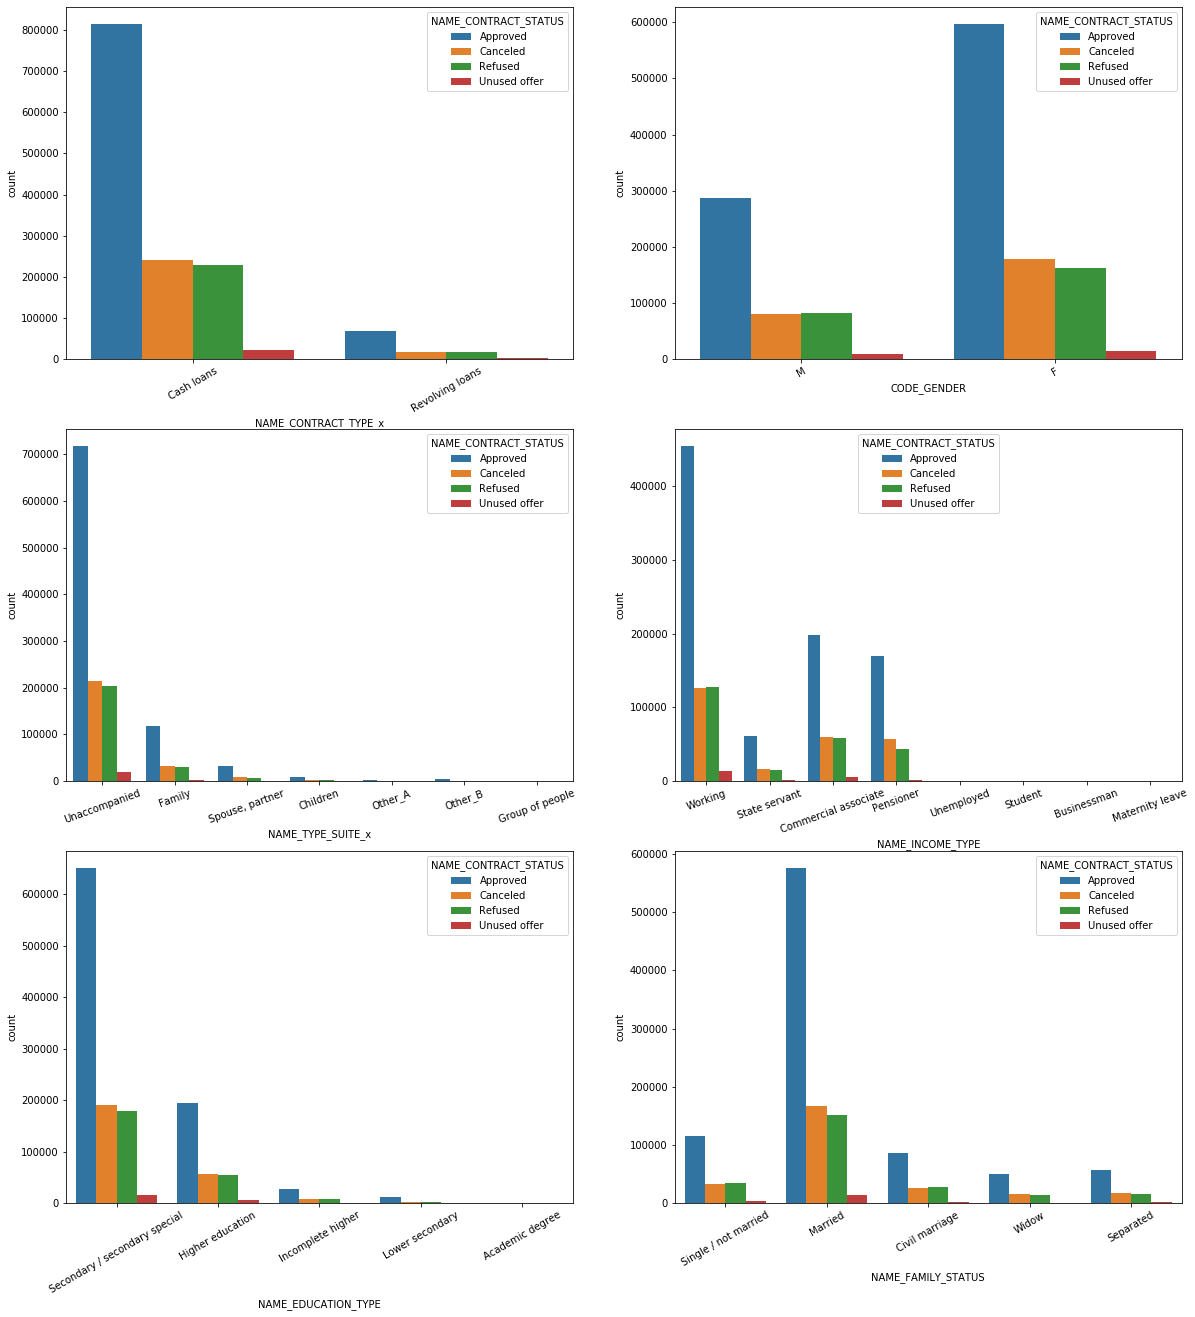

In [52]:
#Univariate analysis on categorical variables
plt.figure(figsize = (20,22))

plt.subplot(3,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE_x', hue = 'NAME_CONTRACT_STATUS', data = merged_df)
plt.xticks(rotation = 30)

plt.subplot(3,2,2)
sns.countplot(x = 'CODE_GENDER', hue = 'NAME_CONTRACT_STATUS', data = merged_df)
plt.xticks(rotation = 30)

plt.subplot(3,2,3)
sns.countplot(x = 'NAME_TYPE_SUITE_x', hue = 'NAME_CONTRACT_STATUS', data = merged_df)
plt.xticks(rotation = 20)

plt.subplot(3,2,4)
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'NAME_CONTRACT_STATUS', data = merged_df)
plt.xticks(rotation = 20)

plt.subplot(3,2,5)
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_STATUS', data = merged_df)
plt.xticks(rotation = 30)

plt.subplot(3,2,6)
sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'NAME_CONTRACT_STATUS', data = merged_df)
plt.xticks(rotation = 30)

plt.show()

#### Loan refused rate is higher for working people who are either single or civil married

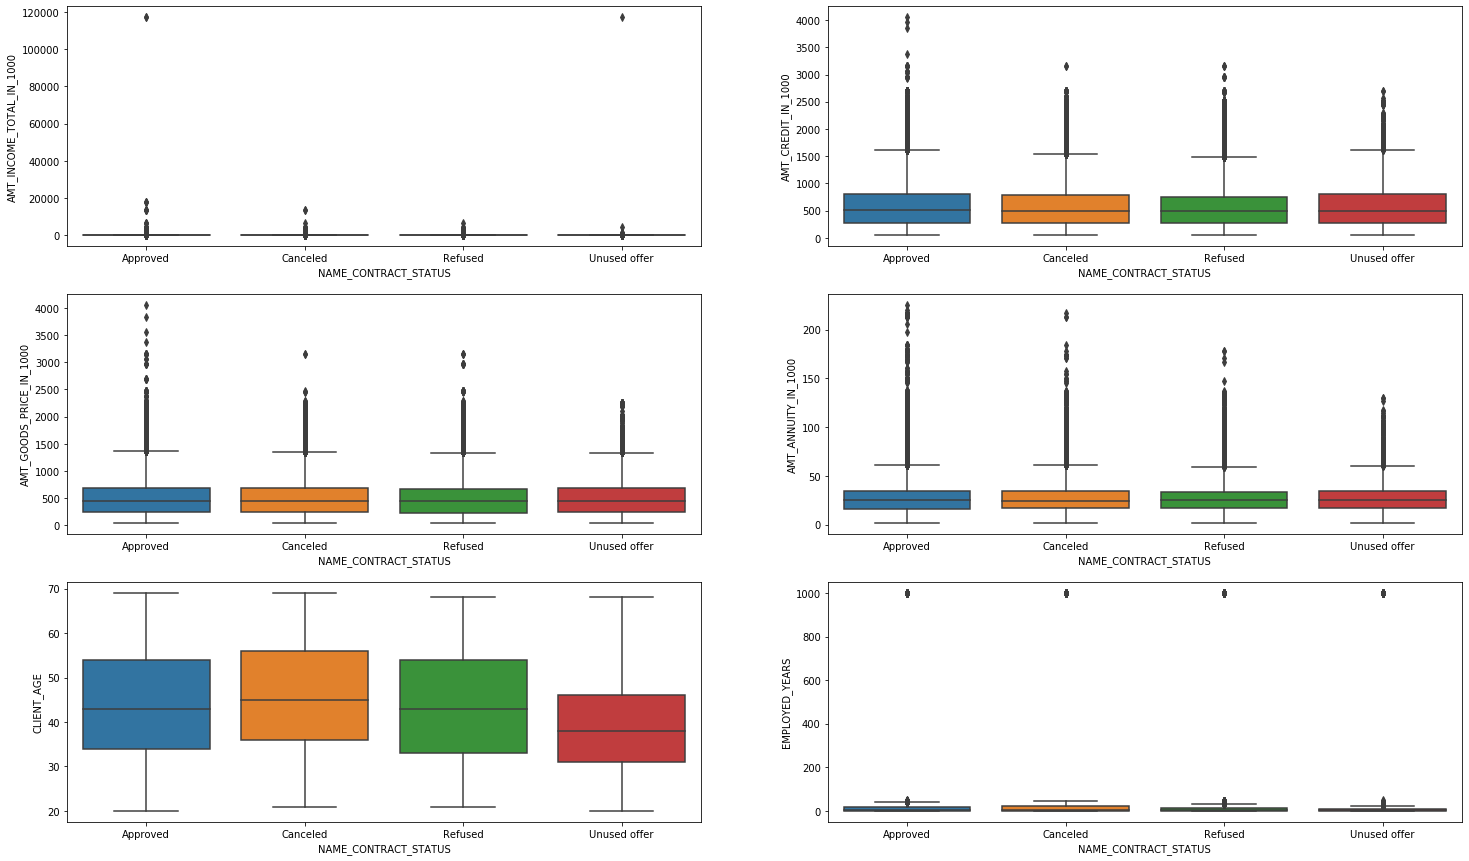

In [53]:
#Univariate analysis on numerical variables
plt.figure(1,figsize=(25,15))

plt.subplot(3,2,1)
sns.boxplot(data=merged_df,x="NAME_CONTRACT_STATUS",y="AMT_INCOME_TOTAL_IN_1000")

plt.subplot(3,2,2)
sns.boxplot(data=merged_df,x="NAME_CONTRACT_STATUS",y="AMT_CREDIT_IN_1000")

plt.subplot(3,2,3)
sns.boxplot(data=merged_df,x="NAME_CONTRACT_STATUS",y="AMT_GOODS_PRICE_IN_1000")

plt.subplot(3,2,4)
sns.boxplot(data=merged_df,x="NAME_CONTRACT_STATUS",y="AMT_ANNUITY_IN_1000")

plt.subplot(3,2,5)
sns.boxplot(data=merged_df,x="NAME_CONTRACT_STATUS",y="CLIENT_AGE")

plt.subplot(3,2,6)
sns.boxplot(data=merged_df,x="NAME_CONTRACT_STATUS",y="EMPLOYED_YEARS")

plt.show()

#### All variables seem to follow a similar distribution for all cases except for CLIENT_AGE where all four cases have a similar distribution but in different age ranges, for example, lower age range for Unused Offers with a small spread while higher age range for Cancelled loans with a larger spread

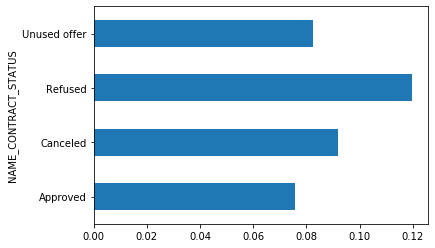

In [54]:
#Plotting NAME_CONTRACT_STATUS against percentage of clients having payment difficulties
merged_df['TARGET'] = merged_df['TARGET'].astype(int)
merged_df.groupby("NAME_CONTRACT_STATUS")["TARGET"].mean().plot.barh()
plt.show()

#### As expected, previously refused loans now fall in the category of people having difficulty in making payments with the highest percentage, that is 12%

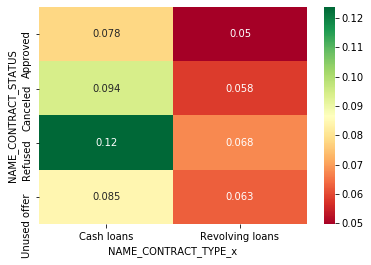

In [55]:
#Plotting Contract type vs Previous contact status vs Target variable
res = pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="NAME_CONTRACT_TYPE_x",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

#### From above we can infer that:
#### 1. Revolving loans are a better option for the bank to sell since these loans have a lower rate of having people having payment difficulties, lowest being for previously approved loans
#### 2. The cash loans have a higher rate of having clients with payment difficulties, the highest being for previously refused loans around 12%

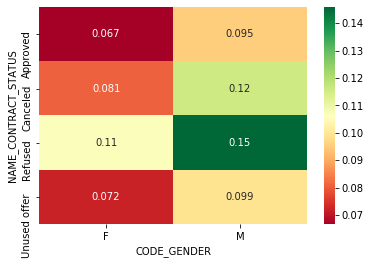

In [56]:
#Plotting Gender vs Previous contact status vs Target variable
res = pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="CODE_GENDER",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

#### From here, we can infer:
#### 1. Females are a better risk for the bank compared to males overall
#### 2. Client's previously refused are most risky

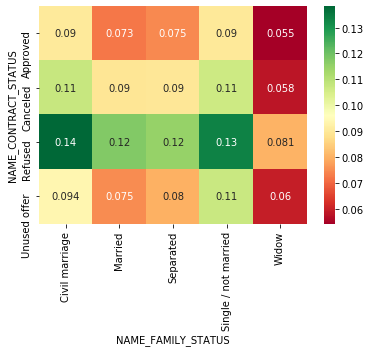

In [57]:
#Plotting Family status vs Previous contact status vs Target variable
res = pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="NAME_FAMILY_STATUS",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

#### From here we can infer:
#### 1. Widows are the best risk overall since they lead to timely payments more often in all scenarios
#### 2. Single and Civil married pose most risk

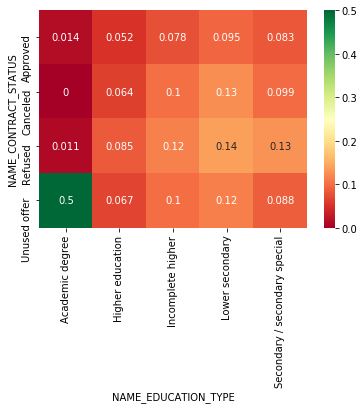

In [58]:
#Plotting Education type vs Previous contact status vs Target variable
res = pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="NAME_EDUCATION_TYPE",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

#### From here we can infer:
#### 1. Clients who previously unused the offer, they most most risk since around 50% of them might have payment difficulties
#### 2. Clients obtained till lower secondry are higher risks compared to others for the bank

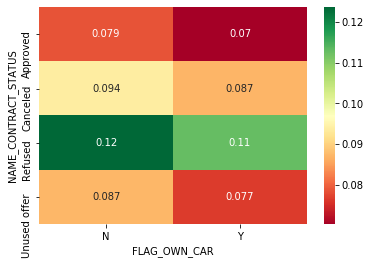

In [59]:
#Plotting FLag own car vs Previous contact status vs Target variable
res = pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="FLAG_OWN_CAR",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

#### No pattern observed

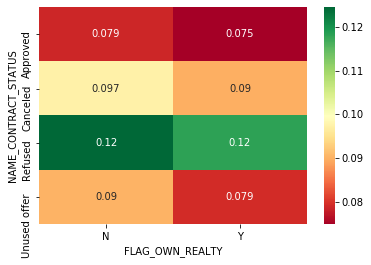

In [60]:
#Plotting FLag own realty vs Previous contact status vs Target variable
res = pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="FLAG_OWN_REALTY",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

#### No pattern observed

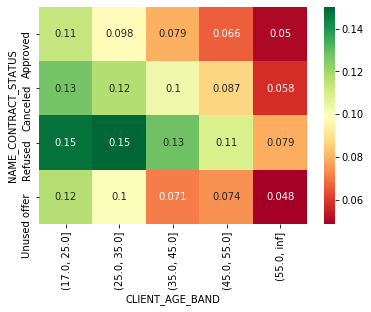

In [61]:
#Plotting FLag own realty vs Previous contact status vs Target variable
res = pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="CLIENT_AGE_BAND",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

#### From here we can infer:
#### 1. Age group of 17-35 years is the riskiest for the bank
#### 2. Age group of 55 and above is the least risky option for the bank

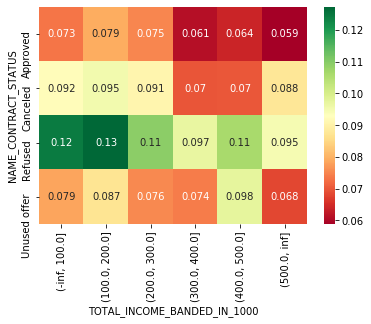

In [62]:
#Plotting Income Bands vs Previous contact status vs Target variable
res = pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="TOTAL_INCOME_BANDED_IN_1000",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

#### No patterns observed except that previously refused loans are now the riskiest

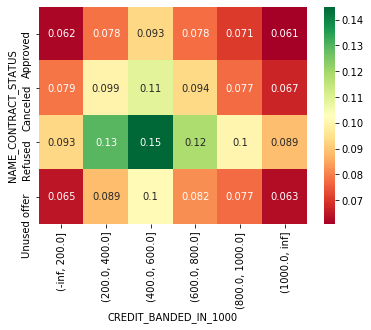

In [63]:
#Plotting Credit amount vs Previous contact status vs Target variable
res = pd.pivot_table(data=merged_df,index="NAME_CONTRACT_STATUS",columns="CREDIT_BANDED_IN_1000",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

#### Loan amount in the range 4 lacs to 6 lacs is the riskiest for the bank

# Conclusion

### Based on the analysis above, the factors that affect the most are:
##### 1. Previously refused loans
##### 2. Client age
##### 3. Family status
##### 4. Contract type
##### 5. Client's gender
##### 6. Client's education level
##### 7. Loan amount

### Recommendations for the bank:
##### 1. Avoid sanctioning loans to clients whose applications were rejected earlier
##### 2. Avoid sanctioning loans to the age group of 17 to 35 and to sanction more loans to the age band of 55 and above
##### 3. Prefer sanctioning loans to widows and avoid to sanction it to unmarried and civil married people
##### 4. Sanctioning revolving loans is a much better option than cash loans, so revolving loans could be used to hedge the risks of cash loans
##### 5. Females should be preferred over males
##### 6. Client's completed education till lower secondary should be avoided
##### 7. Loan amount 4 lacs to 6 lacs is the riskiest range and so should be avoided